¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto Sprint 10 

## Contexto y Objetivos.

Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Condiciones:

Solo se debe usar la regresión lineal para el entrenamiento del modelo.

Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.

El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.


Instrucciones del proyecto

Descarga y prepara los datos. Explica el procedimiento.

Entrena y prueba el modelo para cada región en geo_data_0.csv:

Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

Entrena el modelo y haz predicciones para el conjunto de validación.

Guarda las predicciones y las respuestas correctas para el conjunto de validación.

Muestra el volumen medio de reservas predicho y RMSE del modelo.

Analiza los resultados.

Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.

Prepárate para el cálculo de ganancias:

Almacena todos los valores necesarios para los cálculos en variables separadas.

Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.

Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

Calcula riesgos y ganancias para cada región:

Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior?

## Importación de Datos y Carga de Librerias. 

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, mean_squared_error

In [2]:
df0=pd.read_csv("/datasets/geo_data_0.csv")
df1=pd.read_csv("/datasets/geo_data_1.csv")
df2=pd.read_csv("/datasets/geo_data_2.csv")

### Revisión de Datos. 

In [3]:
print(df0.head())
print()
print(df1.head())
print()
print(df2.head())
print()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746



In [4]:
print(df0.info())
print()
print(df1.info())
print()
print(df2.info())
print()
print(df0.duplicated().sum())
print()
print(df1.duplicated().sum())
print()
print(df2.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

### Conclusiones.

Podemos observar que los tres dataframes estan compuestos por 5 columnas y 100,000 filas, el type de los datos es el correcto en los 3 dataframes y no encontramos valores nulos ni filas repetidas en ninguno de los casos. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración inicial de los datos. En este punto ya tienes una idea general de cómo están distribuidos los datos de las diferentes regiones.
</div>

## Entrenamiento y Prueba del Modelo.

(75000, 5)
(25000, 5)
Mean Squared Error (MSE): 1428.1405969008988
Root Mean Squared Error (RMSE): 37.79074750386526
R^2 Score: 0.26776014012545246
Promedio de las predicciones: 92.5244


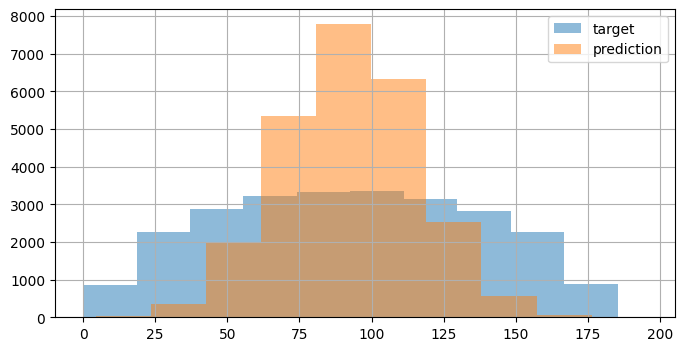

          id        f0        f1        f2     product  predictions
44587  pxU7m  0.317542 -0.248327  6.336022  115.280823   124.089079
78610  Z1XrS -0.796904  0.671518  7.881672  143.001721   117.180341
81732  Nwu1P -0.063480  0.591133  2.861750  183.911296    87.908062
85755  ZjTNn  0.146021  0.804540  2.604513   38.049557    84.079244
58038  JG1Sc  2.089738  0.253895  5.560110  159.519848   119.027789
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 44587 to 55956
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           25000 non-null  object 
 1   f0           25000 non-null  float64
 2   f1           25000 non-null  float64
 3   f2           25000 non-null  float64
 4   product      25000 non-null  float64
 5   predictions  25000 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB
None


In [5]:
# Definimos el target y los features para posteriormente dividir el dataframe en los segmentos de train y valid.
target = "product"
entity_columns = "id"
features = ["f0", "f1", "f2"]

# Dividimos el dataframe en segmentos de train y valid
train, valid = train_test_split(df0, test_size=0.25, random_state=8)

print(train.shape)
print(valid.shape)

# Escalado de datos
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
valid_scaled = scaler.transform(valid[features])

# Entrenamos el modelo
model_0 = LinearRegression()
model_0.fit(train_scaled, train[target])
preds_0 = model_0.predict(valid_scaled)

# Resultados
results_df_0 = valid.copy()
results_df_0["predictions"] = preds_0

mse = mean_squared_error(valid[target], preds_0)
rmse = np.sqrt(mse)
r2 = r2_score(valid[target], preds_0)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')
print(f'Promedio de las predicciones: {round(preds_0.mean(), 4)}')

# Gráfico
plt.figure(figsize=(8, 4))
ax = plt.gca()
valid[target].hist(ax=ax, label="target", alpha=0.5)
ax.hist(preds_0, label="prediction", alpha=0.5)
plt.legend()
plt.show()

print(results_df_0.head())
print(results_df_0.info())


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo segmentando, solamente recuerda realizar el escalado la información. El escalado te puede ser muy útil para mejorar el rendimiento del modelo al asegurar que todas las características tienen el mismo rango. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

### Buenas tardes Tonatiuh, ya incluí el escalado de los datos, tanto en la revisión del primer dataframe como en la función para los otros dos, al no cambiar los valores mantengo las mismas conclusiones, muchas gracias 

In [6]:
def linear_regression_analysis(df, target, features, test_size=0.25, random_state=8, plot_histogram=False, df_name="DataFrame"):
    # Dividimos el dataframe en segmentos de entrenamiento y validación
    train, valid = train_test_split(df, test_size=test_size, random_state=random_state)

    print(f'Tamaño del conjunto de entrenamiento: {train.shape}')
    print(f'Tamaño del conjunto de validación: {valid.shape}')

    # Escalado de datos
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[features])
    valid_scaled = scaler.transform(valid[features])

    # Entrenamos el modelo
    model = LinearRegression()
    model.fit(train_scaled, train[target])

    # Predicciones
    preds = model.predict(valid_scaled)

    # Métricas de evaluación
    mse = mean_squared_error(valid[target], preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(valid[target], preds)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R^2 Score: {r2}')
    print(f'Promedio de las predicciones: {round(preds.mean(), 4)}')

    mean_target_value = valid[target].mean()
    relative_rmse = (rmse / mean_target_value) * 100
    print(f'El RMSE representa aproximadamente el {relative_rmse:.2f}% del valor medio del objetivo.')
    
    # Resultados
    results_df = valid.copy()
    results_df["predictions"] = preds
    results_df.name = df_name

    # Gráfico opcional
    if plot_histogram:
        plt.figure(figsize=(8, 4))
        ax = plt.gca()
        valid[target].hist(ax=ax, label="target", alpha=0.5)
        ax.hist(preds, label="prediction", alpha=0.5)
        plt.legend()
        plt.show()

    return {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'mean_pred': round(preds.mean(), 4),
        'relative_rmse': relative_rmse,
        'results_df': results_df 
    }


Tamaño del conjunto de entrenamiento: (75000, 5)
Tamaño del conjunto de validación: (25000, 5)
Mean Squared Error (MSE): 0.7904608808460346
Root Mean Squared Error (RMSE): 0.8890786696609219
R^2 Score: 0.9996269869164385
Promedio de las predicciones: 69.0012
El RMSE representa aproximadamente el 1.29% del valor medio del objetivo.


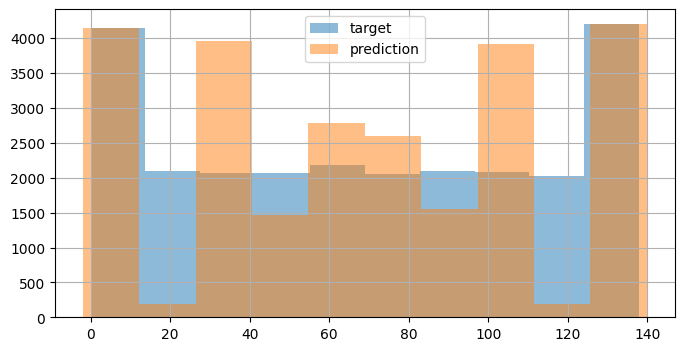

          id         f0         f1        f2     product  predictions
44587  TmNZ6   6.542701  -6.828050  1.002575   26.953261    27.875536
78610  q1ySJ  -2.390464  -1.749470  3.999152  110.992147   109.823286
81732  2EaLb  17.367245  -6.450393  0.009930    0.000000    -0.453222
85755  d0FY2 -11.577116 -11.800480  3.998211  110.992147   111.343662
58038  2QZsS  -1.320143  -6.516750  2.998591   84.038886    82.803660
Nombre del DataFrame resultante: results_df1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 44587 to 55956
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           25000 non-null  object 
 1   f0           25000 non-null  float64
 2   f1           25000 non-null  float64
 3   f2           25000 non-null  float64
 4   product      25000 non-null  float64
 5   predictions  25000 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB
None


In [7]:
target = "product"
features = ["f0", "f1", "f2"]

results = linear_regression_analysis(df1, target, features, plot_histogram=True)

results_df1 = results['results_df']
results_df1.name = "results_df1"

print(results_df1.head())
print("Nombre del DataFrame resultante:", results_df1.name)
print(results_df1.info())

Tamaño del conjunto de entrenamiento: (75000, 5)
Tamaño del conjunto de validación: (25000, 5)
Mean Squared Error (MSE): 1615.3574131618968
Root Mean Squared Error (RMSE): 40.19150921726997
R^2 Score: 0.20357429641696845
Promedio de las predicciones: 95.1301
El RMSE representa aproximadamente el 42.42% del valor medio del objetivo.


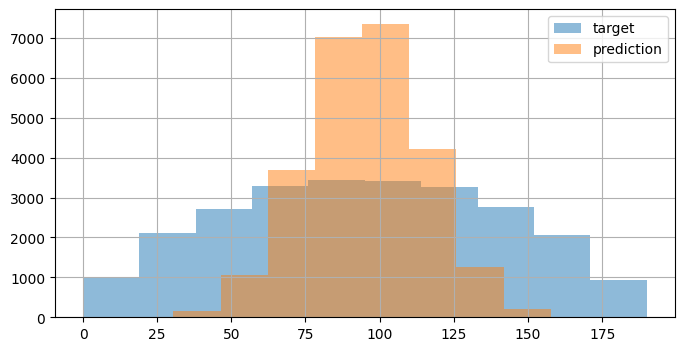

          id         f0         f1        f2     product  predictions
44587  TmNZ6   6.542701  -6.828050  1.002575   26.953261    27.875536
78610  q1ySJ  -2.390464  -1.749470  3.999152  110.992147   109.823286
81732  2EaLb  17.367245  -6.450393  0.009930    0.000000    -0.453222
85755  d0FY2 -11.577116 -11.800480  3.998211  110.992147   111.343662
58038  2QZsS  -1.320143  -6.516750  2.998591   84.038886    82.803660
Nombre del DataFrame resultante: results_df2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 44587 to 55956
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           25000 non-null  object 
 1   f0           25000 non-null  float64
 2   f1           25000 non-null  float64
 3   f2           25000 non-null  float64
 4   product      25000 non-null  float64
 5   predictions  25000 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB
None


In [8]:
target = "product"
features = ["f0", "f1", "f2"]

results = linear_regression_analysis(df2, target, features, plot_histogram=True)

results_df2 = results['results_df']
results_df2.name = "results_df2"

print(results_df1.head())
print("Nombre del DataFrame resultante:", results_df2.name)
print(results_df2.info())

### Conclusiones.

Al usar el modelo de regresión lineal y comparar las predicciones con los datos podemos observar figuras que coinciden parcialmente en los dataframe 0 y 2, sin embargo encontramos discrepancias relevantes en el df1, especialmente en los datos centrales; sin embargo resulta relevante el RSME resulta particularmente alto para los dataframe 0 y 2 (40.82% y 42.42% respectivamente) mientras que para el df1 resulta de solo el 1.29%.

Respecto a las predicciones para el df0 el valor promedio de las predicciones fué de 92.5244, mientras que para el df1 fue de 69.0012 y para el df2 fue de 95.1301.

En otras palabras, los dos DF con mayor valor promedio en las predicciones también manifiestan un RSME mayor. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Implementaste el modelo de regresión logística de forma excelente para los 3 conjuntos de datos! En este punto ya puedes obervar cuál es el modelo con el mayor $R^2$ y menor RMSE. A pesar de que la elección de la región 1 pareciera ser muy clara por estas dos métricas, su volumen es significativamente menor al de las otras regiones. Debido a esto es necesario realizar unos cuántos análisis más.
</div>

## Cálculo de Ganancias

In [9]:
# Variables
income_per_unit= 4500 
cost_per_200wells= 100000000
risk_threshold=0.025


In [10]:
# Comparación del mínimo de barriles requeridos para cubrir la inversión(111.1)

print("La cantidad de reservas medias de la región 0 es:", df0["product"].mean())
print("La cantidad de reservas medias de la región 1 es:", df1["product"].mean())
print("La cantidad de reservas medias de la región 2 es:", df2["product"].mean())

La cantidad de reservas medias de la región 0 es: 92.50000000000001
La cantidad de reservas medias de la región 1 es: 68.82500000000002
La cantidad de reservas medias de la región 2 es: 95.00000000000004


In [11]:
def compute_gains(df,
    prediction_col="predictions",
    product_col="product",
    cost_per_200wells=100000000, 
    income_per_unit=4500,
    print_results=False
):
    df_ordered = df.sort_values(by=prediction_col, ascending=False).reset_index(drop=True)
    top_200_wells = df_ordered.head(200)
    
    estimated_revenues = top_200_wells[prediction_col].sum() * income_per_unit
    estimated_profit = estimated_revenues - cost_per_200wells
    
    real_revenues = top_200_wells[product_col].sum() * income_per_unit
    real_profit = real_revenues - cost_per_200wells
    
    mean_predicted_target = round(top_200_wells[prediction_col].mean(), 4)
    mean_target = round(top_200_wells[product_col].mean(), 4)
    
    if print_results:
        print(f"""
    Mean predicted target: {mean_predicted_target}
    Mean target: {mean_target}
    
    Estimated revenues: {round(estimated_revenues, 4)}
    Estimated profit: {round(estimated_profit, 4)}
    
    Real revenues: {round(real_revenues, 4)}
    Real profit: {round(real_profit, 4)}
    """)
    
    return real_profit, real_revenues, estimated_revenues 
  


In [12]:
dataframes = [results_df_0, results_df1, results_df2]

for i, df in enumerate(dataframes, start=1):
    print(f"\nResultados para DataFrame {i}:")
    real_profit, real_revenues, estimated_revenues = compute_gains(df, print_results=True)
    print(f"DataFrame {i} - Ingresos reales: {round(real_revenues, 4)}")
    print(f"DataFrame {i} - Ingresos estimados: {round(estimated_revenues, 4)}")


Resultados para DataFrame 1:

    Mean predicted target: 155.4662
    Mean target: 146.5445
    
    Estimated revenues: 139919580.0336
    Estimated profit: 39919580.0336
    
    Real revenues: 131890053.4757
    Real profit: 31890053.4757
    
DataFrame 1 - Ingresos reales: 131890053.4757
DataFrame 1 - Ingresos estimados: 139919580.0336

Resultados para DataFrame 2:

    Mean predicted target: 138.7578
    Mean target: 137.9454
    
    Estimated revenues: 124882014.2012
    Estimated profit: 24882014.2012
    
    Real revenues: 124150866.9668
    Real profit: 24150866.9668
    
DataFrame 2 - Ingresos reales: 124150866.9668
DataFrame 2 - Ingresos estimados: 124882014.2012

Resultados para DataFrame 3:

    Mean predicted target: 148.9596
    Mean target: 138.8469
    
    Estimated revenues: 134063624.6759
    Estimated profit: 34063624.6759
    
    Real revenues: 124962219.4566
    Real profit: 24962219.4566
    
DataFrame 3 - Ingresos reales: 124962219.4566
DataFrame 3 - Ingres

### Conclusiones. 

Cuando comparamos las tres regiones podemos observar que la región 0 es la que tiene mayores ganancias(USD$31,890,053.47), aunque no es el que tiene un promedio mas alto entre las regiones (92.50), la región 2 le sigue con  (USD$24,962,219.45) y la cantidad más alta de reservas medias (95). 

La recomendación es que la región 0 sea la elegida. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien calculado el beneficio bruto de las 3 regiones! Estos cálculos te ayudarán en la elección de la mejor región teniendo en cuenta también los beneficios brutos según las predicciones, pero a pesar de que el beneficio bruto sea mayor en tu conjunto data2, es necesario comprobar los riesgos que implica.
</div>



## Riesgos y Ganancias para cada región.

In [13]:
bootstrap_reps = 1000
bootstrap_size = 200  

dataframes = [results_df_0, results_df1, results_df2]

cost_per_200wells = 100000000
income_per_unit = 4500

results = []
for df in dataframes:
    region_gains = []
    
    for _ in range(bootstrap_reps):
        bootstrap_sample = df.sample(n=bootstrap_size, replace=True)
        real_profit = compute_gains(bootstrap_sample)
        region_gains.append(real_profit)

    mean_gain = np.mean(region_gains)
    confidence_interval = np.percentile(region_gains, [2.5, 97.5])
    risk_of_loss = np.mean(np.array(region_gains) < 0) * 100 
    
    results.append({
        "mean_gain": mean_gain,
        "confidence_interval": confidence_interval,
        "risk_of_loss": risk_of_loss
    })

for idx, result in enumerate(results):
    print(f"DataFrame {idx+1}:")
    print(f"Mean Gain: {round(result['mean_gain'], 2)}")
    print(f"95% Confidence Interval: ({round(result['confidence_interval'][0], 2)}, {round(result['confidence_interval'][1], 2)})")
    print(f"Risk of Loss: {round(result['risk_of_loss'], 2)}%")
    print()
    

DataFrame 1:
Mean Gain: 50064841.16
95% Confidence Interval: (-20652971.94, 87654441.44)
Risk of Loss: 33.33%

DataFrame 2:
Mean Gain: 28918060.24
95% Confidence Interval: (-41856497.87, 67562609.46)
Risk of Loss: 33.33%

DataFrame 3:
Mean Gain: 51977394.15
95% Confidence Interval: (-18969601.44, 89469045.17)
Risk of Loss: 33.33%



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo calculando el beneficio promedio, los intervalos de confianza del 95% y el riesgo de pérdidas. El uso de percentiles para los intervalos de confianza es una muy buena práctica este tipo de análisis. Tus cálculos están bien fundamentados y proporcionan información valiosa sobre el rendimiento de las simulaciones de bootstrap.
</div>



### Conclusión.

Al analizar los riesgos y ganancia para cada uno de los dataframe podemos observar que si bien los tres tienen un riesgo de perdida de 33.33% el dataframe 3 tiene ventaja sobre los demas al tener una mayor ganancia (USD$52 millones vs USD$50 millones y USD$28 millones, por lo que a riesgos iguales se cambia la sugerencia para que sea la región 3 la elegida.


<div class="alert alert-block alert-warning">
<b>Resumen de la revisión</b> <a class="tocSkip"></a>

Excelente trabajo! Tu código es ordenado y limpio, tanto tu exploración y procesamiento de datos es correcta y eficiente y además la implementación del modelo de regresión lineal y los análisis posteriores brindaron información confiable y suficiente para la toma de decisiones. Solamente te dejo unos comentarios para termianr de complementar el análisis.  Sigue con el excelente trabajo!

</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>